In [19]:
import numpy as np
import seaborn as sns

# Generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

In [20]:
sample1

array([ 1.29269891,  0.47154792,  0.03032376,  0.07232583, -0.71467058,
        1.68343066,  0.03795639,  1.08459284, -0.62741301, -0.87010576,
       -0.57929558, -0.24721412,  0.16742585,  0.0299498 , -0.66923037,
        0.04809927, -0.53308727, -2.46650969,  1.7135204 ,  0.14445165,
       -0.46053972, -0.58583991, -2.37994385, -1.76925977,  1.48903027,
        0.25702107, -0.70445787,  1.16776616, -0.19317544, -0.70631231,
        0.24072959, -0.10925271,  0.80221243,  0.95266374, -1.53422759,
       -2.39360165, -0.40706542, -0.60452331, -0.66817278,  0.70152068,
        1.04255744,  1.06476462,  1.07410233, -1.45003179, -0.27962958,
       -0.98328697, -1.85810768, -1.95286865,  1.33875099, -0.03964232,
        1.7885997 ,  1.498045  ,  0.67397127, -0.8253926 ,  0.11962906,
        0.98694657, -0.3441894 , -0.89500124,  0.26854458, -0.27487757,
       -1.39273324, -0.4234181 , -1.17583641, -0.23230638,  2.368773  ,
        0.71952009, -0.90585095,  0.79695602, -1.1688781 ,  0.37

<Axes: ylabel='Density'>

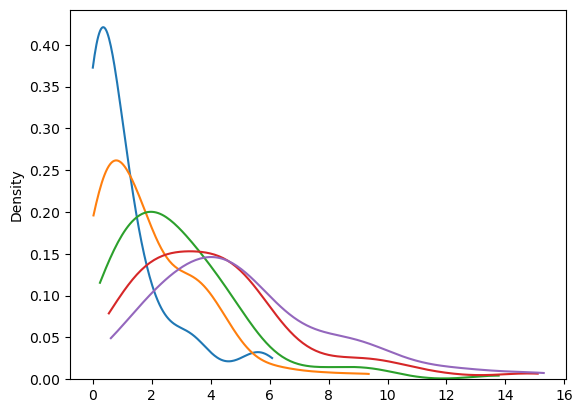

In [21]:
x = sample1**2
y = sample1**2 + sample2**2
z = sample1**2 + sample2**2 + sample3**2
u = sample1**2 + sample2**2 + sample3**2 + sample4**2
v = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

sns.kdeplot(x, clip=(x.min(),x.max()))
sns.kdeplot(y, clip=(y.min(),y.max()))
sns.kdeplot(z, clip=(z.min(),z.max()))
sns.kdeplot(u, clip=(u.min(),u.max()))
sns.kdeplot(v, clip=(v.min(),v.max()))

In [24]:
import scipy.stats as stats

test_statistic = 9.57  # Chi-Square test statistic from the previous example
degrees_of_freedom = 5  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(test_statistic, degrees_of_freedom)

print("P-value:", p_value)


P-value: 0.0883772737603573


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Count passengers in each class
class_counts = data['Pclass'].value_counts().sort_index()
class_counts

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [7]:
# Calculate the expected counts assuming a uniform distribution
total_passengers = len(data)
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print("Expected Passenger Counts (assuming uniform distribution):\n", expected)



Expected Passenger Counts (assuming uniform distribution):
 [297.0, 297.0, 297.0]


In [8]:
# Perform the Chi-Square Goodness of Fit test
chi2, p_value = chisquare(class_counts, expected)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))




Chi-Square Statistic: 191.80
P-value: 0.0000


In [9]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")



We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


In [25]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the Titanic dataset
data = pd.read_csv('titanic_train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [27]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))


Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [28]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.
